In [3]:
import pandas as pd
from collections import Counter
import numpy as np
import datetime as dt
import time

In [4]:
def getwknum(string):
    # this could be sped up since split is O(n)
    # if we could work under assumption timestamps are all exact same,
    # then we can split on index
    month, day, year = map(int, string.split()[0].split("/"))
    return dt.datetime(year, month, day, 0, 0, 0).timetuple().tm_yday // 7


def addWeeks(df):
    df['week'] = df['Trip Start Timestamp'].transform(lambda x: getwknum(x))
    return df

In [5]:
def convert(data):
    trip_miles = {}
    for k, v in data.items():
        taxiID = k[0]
        if taxiID not in trip_miles:
            trip_miles[taxiID] = [0] * 53
        wknum = k[1]
        trip_miles[taxiID][wknum] += float(v)
    return trip_miles

In [6]:
def readAllRows(filename, chunksize, nrows):
    total_count = Counter()
    print("Start reading.")
    for df in pd.read_csv(filename,
                          usecols=["Taxi ID", "Trip Miles",
                                   "Trip Start Timestamp"],
                          dtype={
                              "Taxi ID": object,
                              "Trip Miles": float,
                              "Trip Start Timestamp": object
                          },
                          chunksize=chunksize,
                          iterator=True,
                          nrows=nrows):
        total_count += Counter(addWeeks(df).groupby(["Taxi ID", "week"])["Trip Miles"].sum().to_dict())
        
    headers = ['Taxi ID', *[f'week{i}' for i in range(1, 54)]]
    # new method
    return pd.DataFrame([[key, *val] for key, val in convert(total_count).items()], columns=headers)

In [48]:
id1 = "A"#"fff84aa08ac78890c6e7da64b817cbd9aad6a124104e099a7482efee1a6bac61a837e1db218e9d38c159f28c8f85187a08a05c8ba54648edc3b91e437357fa84"
id2 = "B"#"gff84aa08ac78890c6e7da64b817cbd9aad6a124104e099a7482efee1a6bac61a837e1db218e9d38c159f28c8f85187a08a05c8ba54648edc3b91e437357fa84"

d = {'Taxi ID' : pd.Series(["", id1, "", id2, id2]),
     'week' : pd.Series([1,2,1,2, 2]),
     'Trip Miles': pd.Series([5,5,5,5,0])}
df = pd.DataFrame(d)
print(df)

  Taxi ID  Trip Miles  week
0                   5     1
1       A           5     2
2                   5     1
3       B           5     2
4       B           0     2


In [49]:
s = df.groupby(["Taxi ID", "week"])["Trip Miles"].sum()
print(s)

Taxi ID  week
         1       10
A        2        5
B        2        5
Name: Trip Miles, dtype: int64


In [31]:
s.head()

0    5
1    5
2    5
3    5
Name: Trip Miles, dtype: int64

In [9]:
getwknum("12/31/2015")

52

In [10]:
k = Counter()
c = Counter(s.to_dict())
d = Counter({('A', 1): 5, ('B', 2): 15, ('C', 2): 15})
f = k + c
print(f)
print (f + d)

Counter({('A', 1): 10, ('A', 2): 10})
Counter({('A', 1): 15, ('B', 2): 15, ('C', 2): 15, ('A', 2): 10})


In [21]:
t0 = time.time()
df =  pd.read_csv("Chicago_taxi_trips2013.csv", usecols=["Taxi ID", "Trip Miles",
                                   "Trip Start Timestamp"],
                          dtype={
                              "Taxi ID": object,
                              "Trip Miles": float,
                              "Trip Start Timestamp": object
                          })
t1 = time.time()
print(f"Total sec: {t1-t0}")
total_count = addWeeks(df).groupby(["Taxi ID", "week"])["Trip Miles"].sum().to_dict()
headers = ['Taxi ID', *[f'week{i}' for i in range(1, 54)]]
result = pd.DataFrame([[key, *val] for key, val in convert(total_count).items()], columns=headers, index=None)
result.to_csv(f"out_2013.csv", index=False)

Total sec: 158.17067074775696


In [ ]:
allids = pd.read_csv("Chicago_taxi_trips2017.csv", usecols=["Taxi ID"], dtype={ "Taxi ID": object })

In [ ]:
result["Taxi ID"].nunique()

In [ ]:
len(allids.index)-allids.count()

In [22]:

df =  pd.read_csv("Chicago_taxi_trips2017.csv", usecols=["Taxi ID", "Trip Miles",
                                   "Trip Start Timestamp"],
                          dtype={
                              "Taxi ID": object,
                              "Trip Miles": float,
                              "Trip Start Timestamp": object
                          }, nrows=100)
df.head()
# df = addWeeks(df)
# df.query('week==1').to_csv(f"week1_2017.csv", index=False)

,Taxi ID,Trip Start Timestamp,Trip Miles
0,28d2ef11434811fb64d04e45ed0b0dc0fabdfcfd71247d...,01/13/2017 11:00:00 AM,0.0
1,bb0a5453416563998f2c5b11c17e497689270e336a7887...,03/29/2017 8:15:00 PM,0.7
2,c2b5d2c9d25be474a1378d6238dd5c34cec73a614288ff...,01/06/2017 7:15:00 PM,0.4
3,ebf424bd07c496fc53751e3ab8b11610d91460db7d922e...,02/08/2017 2:30:00 PM,2.6
4,c2b095c52b83f2b9253d33d3bd6d1589c7b6bf76ec4368...,02/26/2017 6:45:00 PM,2.8


In [ ]:
t0 = time.time()
df =  pd.read_csv("Chicago_taxi_trips2017.csv", usecols=["Taxi ID", "Trip Miles",
                                   "Trip Start Timestamp"],
                          dtype={
                              "Taxi ID": object,
                              "Trip Miles": float,
                              "Trip Start Timestamp": object
                          })
t1 = time.time()
df = addWeeks(df)
t2 = time.time()
id = "0008de7a146802839c9e6059f482d292ebdae13c5c31dd6e5983a80882e2a5dbcd6ea098c2fcd56f34ce02645eb94c6b39512e9304837746d4e289b6236c2c5b"
df.query(f'Taxi ID=={id}').to_csv(f"taxi1_2017.csv", index=False)
t3 = time.time()
print(t1-t0)
print(t2-t0)
print(t3-t0)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

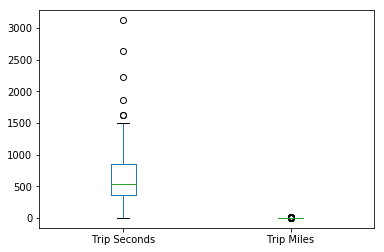

In [43]:
# df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df = pd.read_csv("original/Chicago_taxi_trips2013.csv", usecols=["Trip Miles", "Trip Seconds"], nrows=100)
df.plot.box()

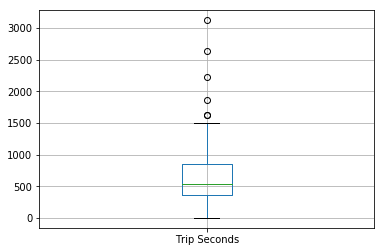

In [39]:
df.boxplot(column=["Trip Seconds"])

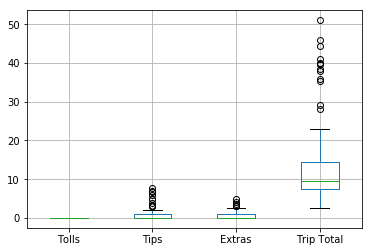

In [41]:
df = pd.read_csv("original/Chicago_taxi_trips2013.csv", usecols=["Trip Total", "Tips", "Extras", "Tolls"], nrows=100)
df = df.applymap(lambda x: float(x[1:]))
df.boxplot(column=["Tolls", "Tips", "Extras", "Trip Total"])